In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import classification_report
from display_results import confusion_matrix

In [3]:
df_activity = pd.read_csv("activities.csv")

In [4]:
def segmentation(x_data,y,overlap_rate,time_window):
    
    seg_data = []
    overlap = int((1 - overlap_rate)*time_window)
    y_segmented_list = []
    
    for i in range(0,x_data.shape[0],overlap):
        seg_data.append(x_data[i:i+time_window])
        y_segmented_list.append(y)

    return seg_data,y_segmented_list

In [5]:
def handle_missing_values(df):
    df['x']=df['x'].replace(0, np.nan)
    df['y']=df['y'].replace(0, np.nan)
    df['z']=df['z'].replace(0, np.nan)
    return df

In [6]:
def get_act_id(seg_id):
    seg = df_activity[df_activity["segment_id"]==seg_id]
    activity_id = seg["activity_id"].values
    return int(activity_id)

In [7]:
def load_data(csv_file):

    y_list = []
    x_data_list = []

    csv_df = pd.read_csv(csv_file)
    csv_df = handle_missing_values(csv_df)
    csv_df.dropna(inplace=True)
    x_data = csv_df.values
    act_id = get_act_id(int(os.path.splitext(os.path.basename(csv_file))[0].replace("segment","")))
    
    return x_data,act_id

In [8]:
def get_features(x_data):
    features = []
    for i in range(x_data.shape[1]):
        # std
        features.append(x_data.T[i].std(ddof=0))
        # avg
        features.append(np.average(x_data.T[i]))
        # max
        features.append(np.max(x_data.T[i]))
        # min
        features.append(np.min(x_data.T[i]))
    return features

In [9]:
csv_files = glob("train/*")

In [10]:
X_feature_data_list = []
y_list = []
for csv_file in csv_files:
    x,y = load_data(csv_file)
    X_feature_data_list.append(get_features(x))
    y_list.append(y)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_feature_data_list,y_list,test_size=0.3)

In [12]:
model_ml = RandomForestClassifier(n_estimators=500,n_jobs=-1)

In [13]:
model_ml.fit(X_train,y_train)
y_predict = model_ml.predict(X_test)

In [14]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.78      0.88      0.82         8
           3       0.92      0.79      0.85        14
           4       0.71      0.62      0.67         8
           6       0.50      0.20      0.29         5
           9       0.57      0.57      0.57         7
          12       0.65      0.92      0.76        12

    accuracy                           0.72        54
   macro avg       0.69      0.66      0.66        54
weighted avg       0.72      0.72      0.71        54



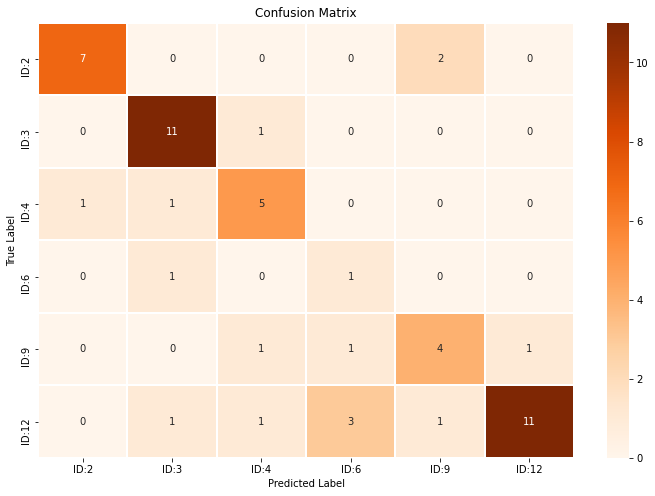

None


In [15]:
print(confusion_matrix(y_test, y_predict))

In [31]:
feature_labels = [a+"_"+feature for a in ["x","y","z"]  for feature in ["std","avg","max","min"] ]

In [38]:
importances = model_ml.feature_importances_  
indices = np.argsort(importances)[::-1]

In [43]:
for f in range(np.array(X_train).shape[1]):
    print("%2d) %s %f" % (f + 1,features_labels[indices[f]],importances[indices[f]]))

 1) y_max 0.142646
 2) z_std 0.105702
 3) y_avg 0.098142
 4) z_avg 0.096538
 5) x_avg 0.094546
 6) y_std 0.090653
 7) z_min 0.084925
 8) x_std 0.075095
 9) z_max 0.070652
10) x_max 0.053525
11) x_min 0.050356
12) y_min 0.037220
